# Modelos de clasificacion - Regresion logistica
El objetivo de este modelo es predecir si un equipo ganará o no una ronda en Counter Strike, utilizando datos generados durante dicha ronda.

La variable a predecir es `RoundWinner`, que es una variable categórica binaria:
- `1` si el equipo gana la ronda.
- `0` si el equipo no gana la ronda.

Este modelo nos permitirá conocer qué variables tienen mayor peso en la probabilidad de éxito durante una ronda.

Las variables seleccionadas como predictores son aquellas que reflejan acciones relevantes durante la ronda o acumuladas en la partida. Se excluyen identificadores o variables categóricas como `Map`, `Team`, etc.

Las variables utilizadas como input son:

- `RLethalGrenadesThrown`, `RNonLethalGrenadesThrown`
- `PrimaryAssaultRifle`, `PrimarySniperRifle`, `PrimaryHeavy`, `PrimarySMG`, `PrimaryPistol`
- `RoundKills`, `RoundAssists`, `RoundHeadshots`, `RoundFlankKills`
- `RoundStartingEquipmentValue`
- `MatchKills`, `MatchFlankKills`, `MatchAssists`, `MatchHeadshots`

In [ ]:
import pandas as pd
#Carga de datos
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
    name=fn
df = pd.read_csv(name, sep=";", encoding='utf-8')

Saving Anexo ET_demo_round_traces_2022.csv to Anexo ET_demo_round_traces_2022.csv


/tmp/ipython-input-1-2125804881.py:7: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(name, sep=";", encoding='utf-8')


In [ ]:
# Limpiar columna objetivo
df['RoundWinner'] = df['RoundWinner'].astype(str).str.strip()
df = df[df['RoundWinner'].isin(['True', 'False'])]
df['RoundWinner'] = df['RoundWinner'].map({'True': 1, 'False': 0})

# Selección de variables numéricas útiles
features = [
    'RLethalGrenadesThrown',
    'RNonLethalGrenadesThrown',
    'PrimaryAssaultRifle',
    'PrimarySniperRifle',
    'PrimaryHeavy',
    'PrimarySMG',
    'PrimaryPistol',
    'RoundKills',
    'RoundAssists',
    'RoundHeadshots',
    'RoundFlankKills',
    'RoundStartingEquipmentValue',
    'MatchKills',
    'MatchFlankKills',
    'MatchAssists',
    'MatchHeadshots'
]

X = df[features]
y = df['RoundWinner']


/tmp/ipython-input-2-1904565588.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RoundWinner'] = df['RoundWinner'].map({'True': 1, 'False': 0})


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Dividir en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
modelo_log = LogisticRegression(max_iter=1000)
modelo_log.fit(X_train, y_train)

# Realizar predicciones
y_pred = modelo_log.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


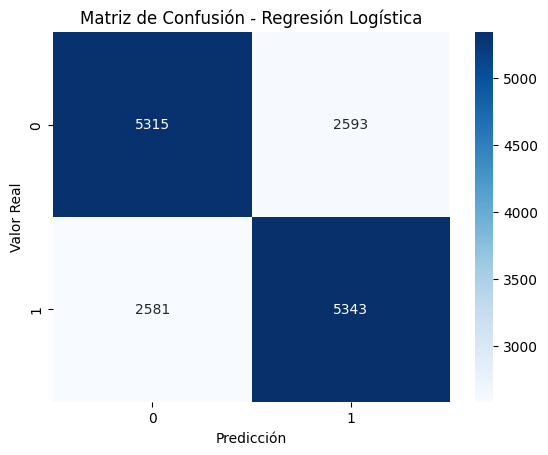

              precision    recall  f1-score   support

           0       0.67      0.67      0.67      7908
           1       0.67      0.67      0.67      7924

    accuracy                           0.67     15832
   macro avg       0.67      0.67      0.67     15832
weighted avg       0.67      0.67      0.67     15832



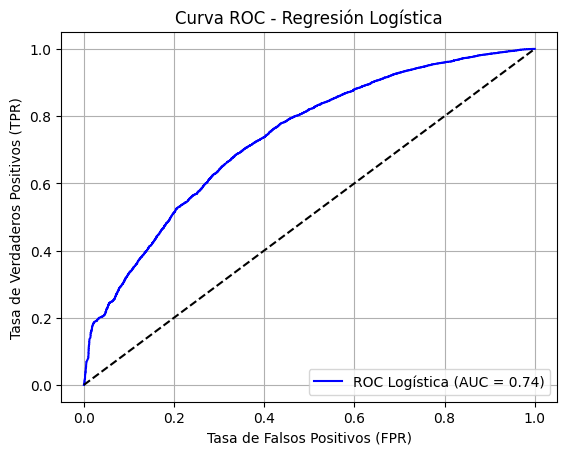

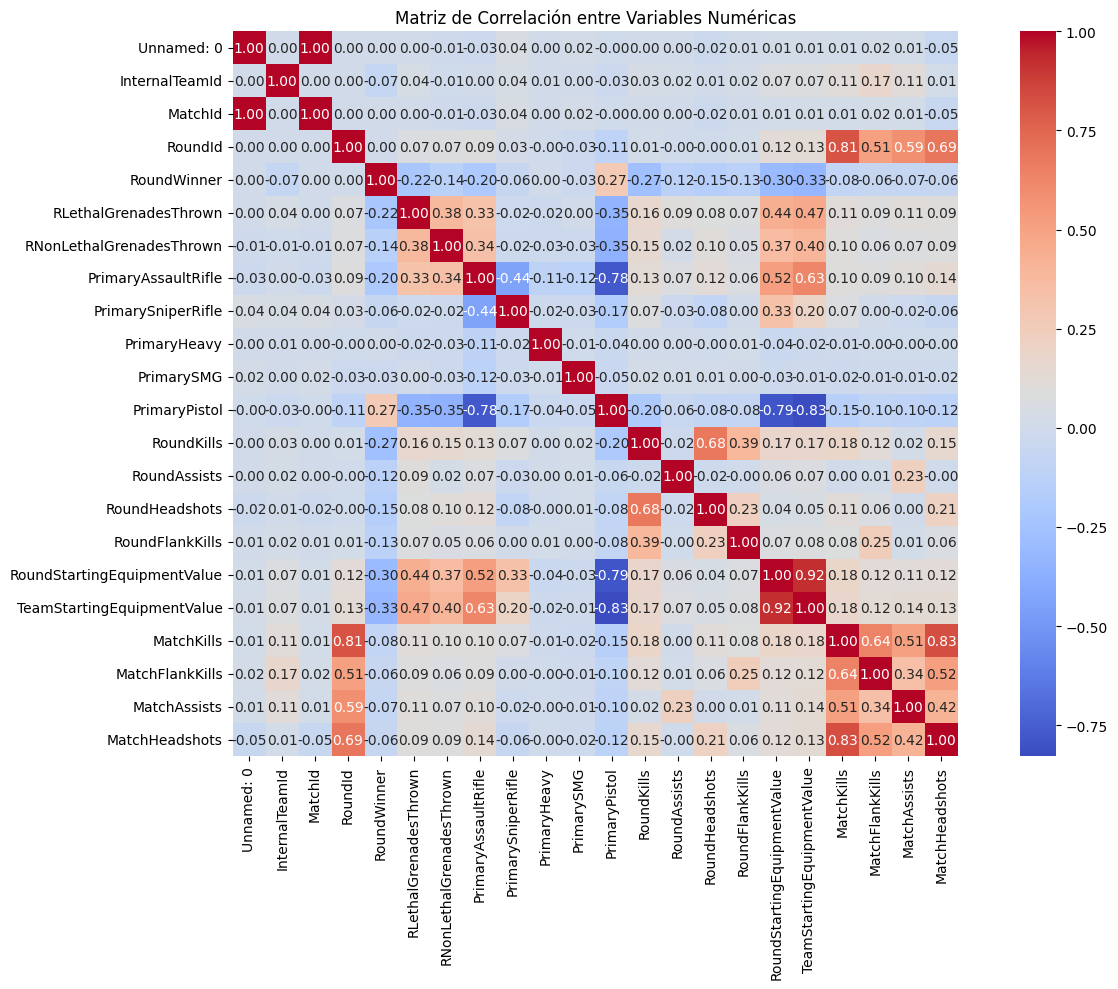

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Matriz de confusión
matriz = confusion_matrix(y_test, y_pred)
sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión - Regresión Logística")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.show()

# Reporte de métricas
print(classification_report(y_test, y_pred))

# Probabilidades de predicción de clase 1
y_probs_log = modelo_log.predict_proba(X_test)[:, 1]

# Calcular curva ROC
fpr, tpr, _ = roc_curve(y_test, y_probs_log)
roc_auc = auc(fpr, tpr)

# Graficar
plt.figure()
plt.plot(fpr, tpr, label=f"ROC Logística (AUC = {roc_auc:.2f})", color="blue")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.title("Curva ROC - Regresión Logística")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo las variables numéricas
df_numericas = df.select_dtypes(include='number')

# Calcular la matriz de correlación
correlacion = df_numericas.corr()

# Generar el heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlacion, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.tight_layout()
plt.show()


El modelo de regresión logística obtuvo un accuracy cercano al 66%, con métricas de precisión y recall similares entre ambas clases. Esto indica que el modelo logra predecir con razonable efectividad cuándo un equipo ganará una ronda, basándose en su desempeño durante la partida.

Sin embargo, el desempeño no es perfecto, por lo que es importante comparar estos resultados con un segundo modelo para evaluar si se puede mejorar la precisión general.